In [1]:
#Import libraries
from fastai.vision.all import *
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F

C:\Users\mindf\anaconda3\envs\ml_mastery_replicates\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
#We want to test different optimizers using different optimizer evaluation functions
#Run each optimizer across a) the Rosenbrock function, b) Local Minima filled functions, c) Bowl-Shaped functions, d) Plate-Shaped functions
# and e) Functions with Steep drops

#After running each optimizer across these functions, take the average across all functions and plot to determine average performance
#Generate  x data for each test - use same initialization distribution to ensure reproducibility and fairness while testing

#Function to calculate the loss (Euclidean distance between current point and global minima)
#The loss will be the DISTANCE from the local minima to the gradient - we're measuring how fast the optimizer can reach this minima
def computeEuclideanLoss(current_point, global_minima):
    #Compute the squared difference between the two vectors
    squared_difference = torch.float_power(torch.subtract(current_point, global_minima), 2.0)
    #Add all squared differences, convert the resulting scalar to a float, and then take the square root
    return torch.sqrt(torch.sum(squared_difference))

#Function to calculate the Rosenbrock loss - given a set of x and y points, this function will determine the respective z coordinate (which is our loss)
#The optimizers chosen will need to optimize this function and arive at its local minima; as it has two input parameters, it forms a three dimensional graph
#The minima of this function is at (1, 1)
def RosenbrockLoss(params):
    #Expand params into x and y value (this is a 3D function and thus only takes in two parameters)
    x, y = params
    term_1 = torch.float_power(1.0 - x, 2)
    term_2 = 100 * torch.float_power(torch.subtract(y, torch.float_power(x, 2)), 2)
    return torch.add(term_1, term_2)

#Initialize x and y vectors - 3D functions will be written in the form z(x, y)
#Both x and y will be initialized with normal distributions from ranges -5 to 5
from random import uniform
x = uniform(-5, 5)
y = uniform(-5, 5)
#Create tuple and convert to tensor
XY = (x, y)
XY_TENSOR = torch.tensor(XY, requires_grad = True)

#Fit the given 3D function
def fitFunction(epochs, params, loss_function, optimizer_function):
    losses = []
    #Iterate over number of epochs
    for epoch in range(epochs):
        #Set all gradients to zero - this is to prevent gradient accumulation as they do not reset per epoch
        optimizer_function.zero_grad()
        #Compute the loss
        loss = loss_function(params)
        #Compute the gradients
        loss.backward()
        #Run the optimizer
        optimizer_function.step()
        #Add loss to loss array
        losses.append(loss)
        
    #Return losses array
    return losses

In [8]:
#Import Custom Adam Optimizer Implementation
from CustomAdam import CustomAdam

#Instantiate optimizer object - use all default parameters as specified in CustomAdam.py
CustomAdamOptimizer = CustomAdam([XY_TENSOR])
custom_Adam_Loss = fitFunction(100, XY_TENSOR, RosenbrockLoss, CustomAdamOptimizer))

tensor([-2.0519, -4.5916], requires_grad=True)
[tensor(7756.6865, dtype=torch.float64, grad_fn=<AddBackward0>), tensor(7747.7007, dtype=torch.float64, grad_fn=<AddBackward0>), tensor(7741.6078, dtype=torch.float64, grad_fn=<AddBackward0>), tensor(7736.2989, dtype=torch.float64, grad_fn=<AddBackward0>), tensor(7731.4060, dtype=torch.float64, grad_fn=<AddBackward0>), tensor(7726.7759, dtype=torch.float64, grad_fn=<AddBackward0>), tensor(7722.3201, dtype=torch.float64, grad_fn=<AddBackward0>), tensor(7717.9812, dtype=torch.float64, grad_fn=<AddBackward0>), tensor(7713.7212, dtype=torch.float64, grad_fn=<AddBackward0>), tensor(7709.5137, dtype=torch.float64, grad_fn=<AddBackward0>), tensor(7705.3363, dtype=torch.float64, grad_fn=<AddBackward0>), tensor(7701.1719, dtype=torch.float64, grad_fn=<AddBackward0>), tensor(7697.0096, dtype=torch.float64, grad_fn=<AddBackward0>), tensor(7692.8381, dtype=torch.float64, grad_fn=<AddBackward0>), tensor(7688.6481, dtype=torch.float64, grad_fn=<AddBackw

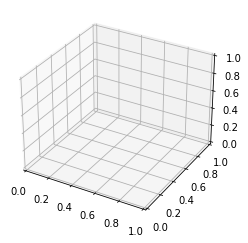

In [10]:
#Plot losses on a 3D graph of the given function
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

figure = plt.figure()
ax = plt.axes(projection = "3d")

In [ ]:
#Dictionaries of all functions to be fit (equations) and their minima
OPTIMIZER_TEST_FUNCTIONS = {"ROSENBROCK" : "(1 - {})**2 + 100*({}-({}**2))**2".format()}